In [1]:
# Setting up the environment
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
# Importing zipcodes
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head()

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


<Axes: >

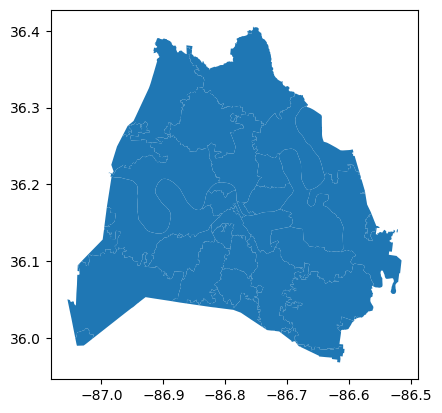

In [15]:
zipcodes.plot()

In [16]:
# Reading in bike rack data
bike_racks = pd.read_csv('../data/BikeRacks.csv')
print(bike_racks.shape)
bike_racks.head(3)

(430, 13)


,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle
0,POINT (-86.65545277788499 36.049927777764),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept
1,POINT (-86.63406252260494 36.185280037810095),Rack,2,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept
2,POINT (-86.62067056966654 36.1584215986261),Rack,3,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept


In [18]:
# Creating a GeoDataFrame
bike_geo = gpd.GeoDataFrame(bike_racks, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(bike_racks.LON, bike_racks.LAT))

In [19]:
type(bike_geo)

geopandas.geodataframe.GeoDataFrame

In [21]:
# Keeping the necessary columns
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [22]:
# Joining to return bike racks within a zip code polygon
racks_by_zip = gpd.sjoin(bike_geo, zipcodes, predicate = 'within')

In [23]:
racks_by_zip.head()

,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle,geometry,index_right,zip,po_name
0,POINT (-86.65545277788499 36.049927777764),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept,POINT (-86.65545 36.04993),51,37013,ANTIOCH
1,POINT (-86.63406252260494 36.185280037810095),Rack,2,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept,POINT (-86.63406 36.18528),37,37214,NASHVILLE
2,POINT (-86.62067056966654 36.1584215986261),Rack,3,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept,POINT (-86.62067 36.15842),37,37214,NASHVILLE
3,POINT (-86.68652592673462 36.18754669484766),Rack,4,Public,Existing,115,1,Park/Greenway,5,-86.686526,36.187547,"Two Rivers Golf Course, Stones River Greenway ...",Health Dept,POINT (-86.68653 36.18755),37,37214,NASHVILLE
4,POINT (-86.76218008308796 36.17245540617397),Rack,5,Public,Existing,103,3,Park/Community Center,15,-86.762180,36.172455,East Park & Community Center,Health Dept,POINT (-86.76218 36.17246),13,37206,NASHVILLE


In [25]:
# Counting bike racks per zipcode
racks_by_zip['zip'].value_counts()

zip
37203    51
37201    44
37206    36
37209    31
37219    29
37208    28
37207    21
37210    20
37211    17
37216    17
37013    16
37115    16
37214    15
37076    13
37218    10
37221    10
37228     8
37217     8
37212     7
37205     7
37213     5
37204     4
37215     3
37138     3
37220     3
37189     2
37080     1
37072     1
Name: count, dtype: int64

In [27]:
# Let's look at 37203 since it has the most bike racks
racks_in_37203 = racks_by_zip[racks_by_zip['zip'] == '37203']
racks_in_37203.shape

(51, 17)

In [28]:
# Narrowing down map to only 37203
polygon37203 = zipcodes[zipcodes['zip'] == '37203']
polygon37203.shape

(1, 3)

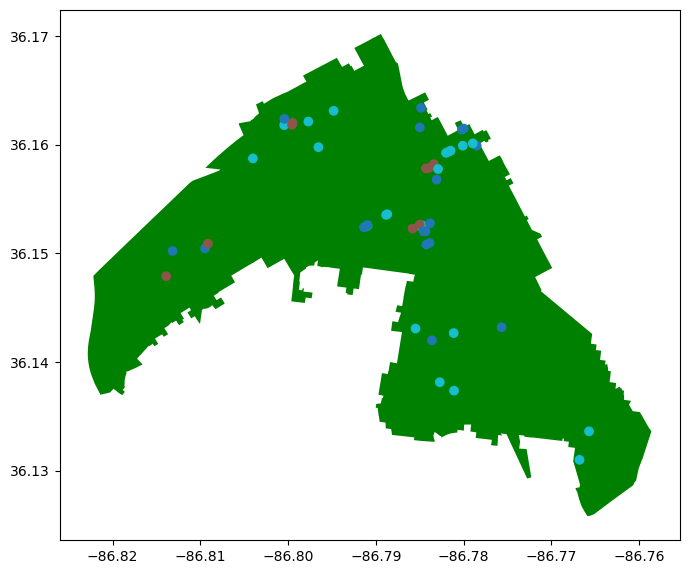

In [30]:
# Plotting the two together
ax = polygon37203.plot(figsize = (8, 10), color = 'green')
racks_in_37203.plot( ax = ax, column = 'Status');
plt.show()

In [31]:
# Let's add a street map with the folium package
polygon37203.geometry.centroid

/var/folders/09/j9tptphx6fn88qcs22y_tvsh0000gn/T/ipykernel_89545/651956959.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37203.geometry.centroid


35    POINT (-86.78899 36.14860)
dtype: geometry

In [32]:
center = polygon37203.geometry.centroid[35]
print(center)

POINT (-86.7889889966741 36.14860232841574)


/var/folders/09/j9tptphx6fn88qcs22y_tvsh0000gn/T/ipykernel_89545/4090195936.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37203.geometry.centroid[35]


In [33]:
# Constructing the array for folium location
area_center = [center.y, center.x]

# Check the order of area_center, the location for our folium map
print(area_center)

[36.14860232841574, -86.7889889966741]


In [36]:
# Creating our map of Nashville Zip Code 37203
map_37203 = folium.Map(location =  area_center, zoom_start = 14)
map_37203

In [37]:
# Iterating through to prepare data for markers
i = 0
for row_index, row_values in racks_in_37203.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 14
values are:
 
the_geom             POINT (-86.7849098060745 36.15249361904691)
Type                                                        Rack
OBJECTID                                                      15
Domain                                                    Public
Status                                                  Proposed
IDNumber                                                     260
Quantity                                                       0
Location                                                Bus Stop
Capacity                                                       0
LON                                                    -86.78491
LAT                                                    36.152494
Detail_Loc     Bus Stop; 12th Ave S at Pine St - The Turnip T...
Data_Colle                                           Health Dept
geometry                     POINT (-86.7849098061 36.152493619)
index_right                                                   35

In [56]:
# Putting the map together

# Draw our zip code area: 37203
map_37203 = folium.Map(location=area_center, zoom_start=14)

folium.GeoJson(polygon37203).add_to(map_37203)

# Define a function to determine marker color based on status (existing or proposed)
def get_marker_color(status):
    if status == 'Existing':
        return 'green'
    elif status == 'Proposed' or 'Future Artistic':
        return 'lightgray'
    else:
        return 'black'

# Iterate through racks_in_37203 to create locations and markers for each bus stop
for row_index, row_values in racks_in_37203.iterrows():
    loc = [row_values['LAT'], row_values['LON']]
    pop = 'Capacity: ' + str(row_values['Capacity'])
    icon = folium.Icon(color=get_marker_color(row_values['Status']), icon="fa-sharp fa-light fa-bicycle", prefix='fa')
    
    marker = folium.Marker(
        location=loc, 
        popup=pop, 
        icon=icon
    ) 

    marker.add_to(map_37203)

map_37203.save('../maps/map37203.html')

# Display our map
map_37203
